In [1]:
#####################################################################
## This code is used to test the use of a dictionary containing data
## numpy arrays for the bitmaps, as an option to using either Pandas
## or MongoDB.
#####################################################################

In [2]:
# Import dependencies
import numpy as np
import random

# Import image handling dependencies
from PIL import Image

# Import image ploting dependencies
import matplotlib.pyplot as plt

# Import json for exporting the dictionaries
# import json


In [3]:
# Create an empty dictionary to store the bitmap images
bitmap_images_dict = {"punk_id":[],
                     "image_bitmap":[]
                     }

In [4]:
# Create an empty dictionary to store the machine learning data
machine_learning_dict = {"punk_id":[],
                        "type_ML":[],
                        "glasses_ML":[],
                        "normalized_bitmap":[]
                        }

In [5]:
# Loop through the ids and populate the two dictionaries
for i in range(10000):
    
    punk_id = i
    
    # OJO EN ESTA SECCION
    type_ML = random.randrange(0,2,1)
    glasses_ML = random.randrange(0,1,1)
    
    # Read the image file for the punk_id
    file_to_open = ("../images/"+str(i)+".png")
    rgb_image = Image.open(file_to_open)
    
    # Convert the image to a bitmap array
    rgb_bit_map = np.asarray(rgb_image)
    
    # Add the images to the bitmap image dictionary
    bitmap_images_dict["punk_id"] += [punk_id]
    bitmap_images_dict["image_bitmap"] += [rgb_bit_map]
    
    # Normalize the bitmap array for use by the Machine Learning model
    norm_rgb_bit_map = rgb_bit_map / 255
    
    # Add the new data to the machine learning dictionary
    machine_learning_dict["punk_id"] += [punk_id]
    machine_learning_dict["type_ML"] += [type_ML]
    machine_learning_dict["glasses_ML"] += [glasses_ML]
    machine_learning_dict["normalized_bitmap"] += [norm_rgb_bit_map]

In [6]:
# Inspect the data types in the bitmap image dictionary

# 1. Get a list of the dictionary keys
keys = bitmap_images_dict.keys()

# 2. For each key, inspect the first value in its corresponding
#    list for its data type
for key in keys:
    print("Data type of ",key," is: ",type(bitmap_images_dict[key][0]))

Data type of  punk_id  is:  <class 'int'>
Data type of  image_bitmap  is:  <class 'numpy.ndarray'>


In [7]:
# Export the bitmap image dictionary as a numpy file

np.save("../Data/bitmap_images.npy", bitmap_images_dict)

## COMMENT: to read this file later into a new dictionary, 
## use the following code:

# new_dict = np.load("../Data/bitmap_images.npy", allow_pickle='True')

## COMMENT: trying with json.dump yields an error, as json
## cannot handle arrays

# with open("../Data/bitmap_images.json", "w") as file_path:
#    json.dump(bitmap_images_dict, file_path)

In [8]:
# Inspect the data types in the machine learning dictionary

# 1. Get a list of the dictionary keys
keys = machine_learning_dict.keys()

# 2. For each key, inspect the first value in its corresponding
#    list for its data type
for key in keys:
    print("Data type of ",key," is: ",type(machine_learning_dict[key][0]))

Data type of  punk_id  is:  <class 'int'>
Data type of  type_ML  is:  <class 'int'>
Data type of  glasses_ML  is:  <class 'int'>
Data type of  normalized_bitmap  is:  <class 'numpy.ndarray'>


In [9]:
# Set the normalized bitmap as training data
X_train = np.array(machine_learning_dict["normalized_bitmap"])

# Inspect the first item in the training data
print(X_train[0])

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [10]:
# Set the hot-one encoded type as target training data
y_train = np.array(machine_learning_dict["type_ML"])

# Inspect the first item in the target training data
print(y_train[0])

0


In [11]:
# Inspect the data types
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# Inspect the shape of the data
print(X_train.shape)
print(y_train.shape)

(10000, 24, 24, 4)
(10000,)


In [13]:
# Take a look at a random image as an array
index = random.randrange(0,10000,1)
X_train[index]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

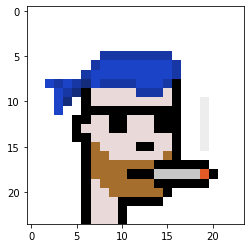

In [14]:
# Show the image as a picture
img = plt.imshow(X_train[index])

In [15]:
# Inspect several bits to ensure the RGB data is normalized
X_train[index][12]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.91764706, 0.85098039, 0.85098039, 1.        ],
       [0.91764706, 0.85098039, 0.85098039, 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.91764706, 0.85098039, 0.85098039, 1.        ],
       [0.91764706, 0.85098039, 0.85098039, 1.        ],
       [0.91764706, 0.85098039, 0.85098039, 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        ,